<a href="https://colab.research.google.com/github/williambrunos/Mandacaru-Dev-Cacto/blob/main/Atividade-2/Atividade_2_Cacto.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# AITVIDADE 2 - MANDACARU.DEV - MÓDULO CACTO - DATA SCIENCE

**Estudante: William Bruno Sales de Paula Lima**

[Formulário de envio](https://forms.gle/K1eY6eSMitzoaHjG8)

Objetivo: Criar visualizações gráficas de informações disponíveis via **API do IBGE**
 
Escolha dois estados de acordo com a incial de seu primeiro nome.
 
Primeira letra do nome: 

A-F: Mato Grosso e Goiás

G-J: Minas Gerais e Espírito Santo

K-N: Bahia e Pernambuco

O-S: Pará e Tocantins

T-Z: Paraná e Santa Catarina
 
Utilize as APIs do IBGE, como visto na aula da semana 5, e apresente as visualizações solicitadas a seguir:
 
1) Exiba dois box plots lado a lado, um para cada estado, dos índices solicitados:

a - Rendimento nominal médio mensal per capita (3974, censo Demográfico 2010)

b - Número de cabeças de bovinos Total (1224 - Censo Agropecuário 2006)
obs: as amostras do box plot devem corresponder às cidades de cada estado.
 
2) Exiba um gráfico de linha, onde cada linha corresponda a um estado, com a informação de:

a - Índices da Construção Civil: Custo médio (2296) por número índice (49) a partir de 1º de Janeiro de 2000

b - Produto Interno Bruto: Índice Gini do PIB, referência 2010 (5939, 529) para cada estado, a partir de 2002
 
3) Crie uma visualização em mapa coroplético do número de fundações privadas e associações sem fins lucrativos:

a - Número total de unidades (6917 - 2122) por município, no ano de 2016

b - Exiba, também, o número de unidades per capita, utilizando os dados de estimativa populacional em 2021 
 
OBS: Utilize o query builder da API do IBGE: https://servicodados.ibge.gov.br/api/docs/agregados?versao=3#api-bq e se baseie nos notebooks das semanas 4 e 5.
 
Entrega até dia 14/05

In [1]:
import requests                    # api module
import json
import pandas as pd

In [36]:
# renda nomial média das cidades das UFs
url_rend_nom = 'https://servicodados.ibge.gov.br/api/v3/agregados/3974/periodos/2010/variaveis/3948?localidades=N6[N3[41,42]]|N3[41,42]&classificacao=12085[100543]|58[95253]'

response_rend_nom = requests.get(url_rend_nom)
df_rend_nom = response_rend_nom.json()
for item in df_rend_nom:
  for key in item['resultados']:
    rendJson = key
# df_rend_nom.pop('classificacoes')
df_rend_nom = pd.json_normalize(rendJson['series'])
df_rend_nom

,localidade.id,localidade.nivel.id,localidade.nivel.nome,localidade.nome,serie.2010
0,4100103,N6,Município,Abatiá - PR,560.2
1,4100202,N6,Município,Adrianópolis - PR,476.9
2,4100301,N6,Município,Agudos do Sul - PR,566.7
3,4100400,N6,Município,Almirante Tamandaré - PR,673.0
4,4100459,N6,Município,Altamira do Paraná - PR,501.5
...,...,...,...,...,...
689,4219606,N6,Município,Xavantina - SC,996.8
690,4219705,N6,Município,Xaxim - SC,824.9
691,4219853,N6,Município,Zortéa - SC,907.7
692,41,N3,Unidade da Federação,Paraná,936.8


In [37]:
df_rend_nom.drop([692, 693], inplace=True)
df_rend_nom['localidade.nivel.nome'].unique()

array(['Município'], dtype=object)

In [38]:
df_rend_nom

,localidade.id,localidade.nivel.id,localidade.nivel.nome,localidade.nome,serie.2010
0,4100103,N6,Município,Abatiá - PR,560.2
1,4100202,N6,Município,Adrianópolis - PR,476.9
2,4100301,N6,Município,Agudos do Sul - PR,566.7
3,4100400,N6,Município,Almirante Tamandaré - PR,673.0
4,4100459,N6,Município,Altamira do Paraná - PR,501.5
...,...,...,...,...,...
687,4219408,N6,Município,Witmarsum - SC,838.1
688,4219507,N6,Município,Xanxerê - SC,944.6
689,4219606,N6,Município,Xavantina - SC,996.8
690,4219705,N6,Município,Xaxim - SC,824.9


In [39]:
df_rend_nom.shape

(692, 5)

In [40]:
cities = []
states = []
for item in df_rend_nom['localidade.nome'].str.split(' - ',1).tolist():
  citie = item[0]
  state = item[1]
  cities.append(citie)
  states.append(state)

In [41]:
# Criando uma coluna de UF e outra de CIDADE
df_rend_nom['CIDADE'] = cities
df_rend_nom['UF'] = states
df_rend_nom.head()

,localidade.id,localidade.nivel.id,localidade.nivel.nome,localidade.nome,serie.2010,CIDADE,UF
0,4100103,N6,Município,Abatiá - PR,560.2,Abatiá,PR
1,4100202,N6,Município,Adrianópolis - PR,476.9,Adrianópolis,PR
2,4100301,N6,Município,Agudos do Sul - PR,566.7,Agudos do Sul,PR
3,4100400,N6,Município,Almirante Tamandaré - PR,673.0,Almirante Tamandaré,PR
4,4100459,N6,Município,Altamira do Paraná - PR,501.5,Altamira do Paraná,PR


In [42]:
# Realizando pré-processamento nos dados
df_rend_nom.drop(columns=[df_rend_nom.columns[1],
                          df_rend_nom.columns[2]
                          ],
                 inplace=True)
df_rend_nom.rename(columns={df_rend_nom.columns[0]: 'ID',
                            df_rend_nom.columns[1]: 'Localização',
                            df_rend_nom.columns[2]: 'Renda_Nominal'},
                   inplace=True)
df_rend_nom.head()

,ID,Localização,Renda_Nominal,CIDADE,UF
0,4100103,Abatiá - PR,560.2,Abatiá,PR
1,4100202,Adrianópolis - PR,476.9,Adrianópolis,PR
2,4100301,Agudos do Sul - PR,566.7,Agudos do Sul,PR
3,4100400,Almirante Tamandaré - PR,673.0,Almirante Tamandaré,PR
4,4100459,Altamira do Paraná - PR,501.5,Altamira do Paraná,PR


In [43]:
df_rend_nom.set_index('ID', inplace = True)
df_rend_nom['Renda_Nominal'] = df_rend_nom['Renda_Nominal'].astype(float)
df_rend_nom.head()

,Localização,Renda_Nominal,CIDADE,UF
ID,,,,
4100103,Abatiá - PR,560.2,Abatiá,PR
4100202,Adrianópolis - PR,476.9,Adrianópolis,PR
4100301,Agudos do Sul - PR,566.7,Agudos do Sul,PR
4100400,Almirante Tamandaré - PR,673.0,Almirante Tamandaré,PR
4100459,Altamira do Paraná - PR,501.5,Altamira do Paraná,PR


In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

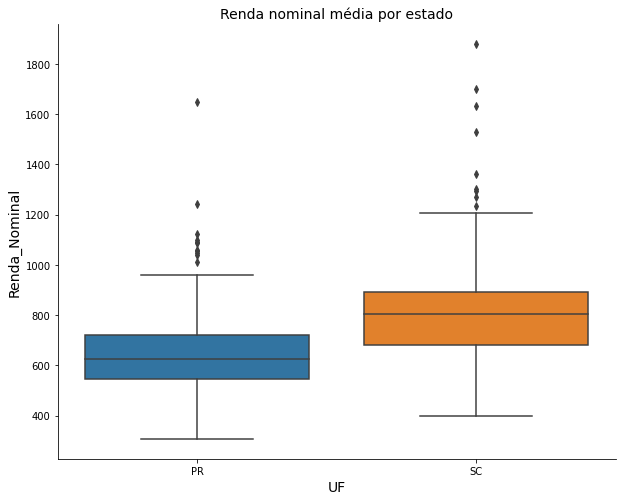

In [46]:
fig, ax = plt.subplots(figsize=(10, 8))

ax.set_title('Renda nominal média por estado', fontsize=14)
ax.set_xlabel('UF', fontsize=14)
ax.set_ylabel('Renda Nominal', fontsize=14)

sns.boxplot(data=df_rend_nom, x='UF', y='Renda_Nominal', ax=ax)
sns.despine()

plt.show()